In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler








In [68]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
data = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

C:\Users\alsab\AppData\Local\Temp\ipykernel_8568\652088263.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


In [69]:

data = data.dropna()

In [70]:

X = data[['Weight']]
y = data[['MPG']]

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.15),


    tf.keras.layers.Dense(1)  
  
])

c:\Users\alsab\anaconda3\envs\anaconda-toolbox\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])


In [74]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1 )


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 608.0107 - mae: 23.2333 - mse: 608.0107 - val_loss: 677.1010 - val_mae: 24.7290 - val_mse: 677.1010
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 586.1716 - mae: 22.8385 - mse: 586.1716 - val_loss: 670.4072 - val_mae: 24.5324 - val_mse: 670.4072
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 563.6306 - mae: 22.1889 - mse: 563.6306 - val_loss: 659.9560 - val_mae: 24.2544 - val_mse: 659.9560
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 539.4193 - mae: 21.5145 - mse: 539.4193 - val_loss: 646.4429 - val_mae: 23.8993 - val_mse: 646.4429
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 532.1447 - mae: 21.1773 - mse: 532.1447 - val_loss: 628.7961 - val_mae: 23.4447 - val_mse: 628.7961
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 531.6939 - mae: 21.1177 - mse: 531.6939 - val_loss: 601.0524 - val_mae: 22.7800 - val_mse: 601.0524
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 466.8

In [76]:
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Test MAE: 2.7525
Test MSE: 14.7779


In [77]:
y_pred = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


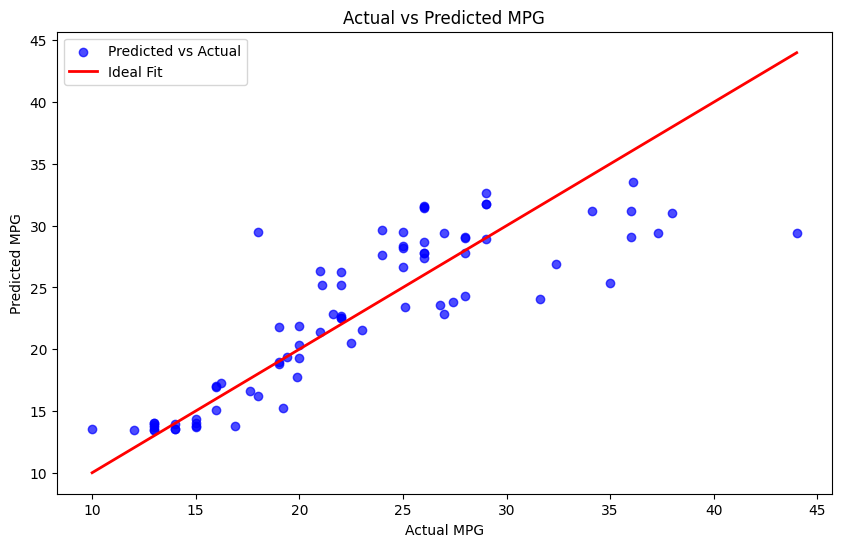

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2, label="Ideal Fit")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.legend()
plt.show()

In [79]:
model.evaluate(X_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.4611 - mae: 2.7936 - mse: 15.4611 


[14.777918815612793, 2.7525246143341064, 14.777918815612793]